# Case Study - Regression

This data is a **regression problem**, trying to predict life expectancy.

The followings describe the features.

- **Country**
- **Year**
- **Status**: Developed or Developing status
- **Life expectancy**: Life Expectancy in age
- **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- **Infant deaths**: Number of Infant Deaths per 1000 population
- **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- **Percentage expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- **Measles**: - number of reported cases per 1000 population
- **BMI** Average Body Mass Index of entire population
- **under-five deaths**: Number of under-five deaths per 1000 population
- **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
- **Total expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
- **Diphtheria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- **HIV/AIDS**: Deaths per 1000 live births HIV/AIDS (0-4 years)
- **GDP**: Gross Domestic Product per capita (in USD)
- **Population**: Population of the country
- **thinness 1-19 years**: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- **thinness 5-9 years**: Prevalence of thinness among children for Age 5 to 9(%)
- **Income composition of resources**: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- **Schooling**: Number of years of Schooling(years)

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.2')

## 1. Load data

In [3]:
df = pd.read_csv('data/Life_Expectancy_Data.csv')

In [4]:
# print the first rows of data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
# Check the shape of your data
df.shape

(2938, 22)

In [6]:
# Statistical info Hint: look up .describe()
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Check the column names
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
# rename columns
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

In [11]:
# Notice that the column names changed
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

### 2.1 Univariate analyis

Single variable exploratory data anlaysis

#### Countplot

<Axes: xlabel='status', ylabel='count'>

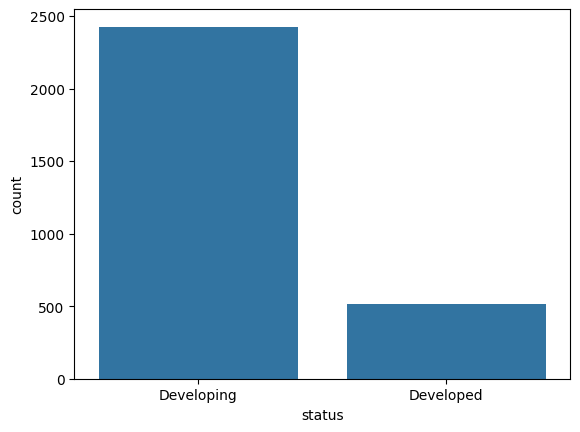

In [12]:
# Let's see how many developing and developed countries there are
sns.countplot(data = df, x = 'status')

#### Distribution plot

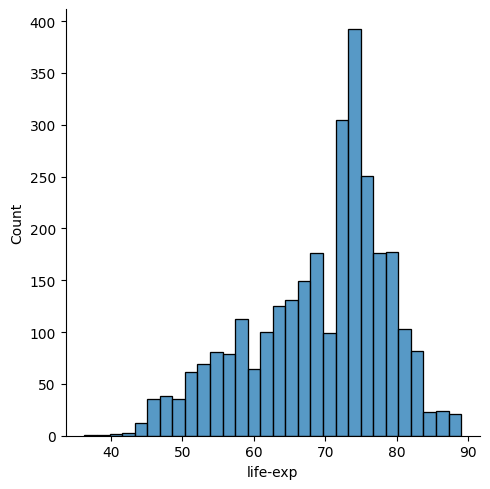

In [13]:
sns.displot(data = df, x = 'life-exp')

### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

Text(0.5, 0, 'Status')

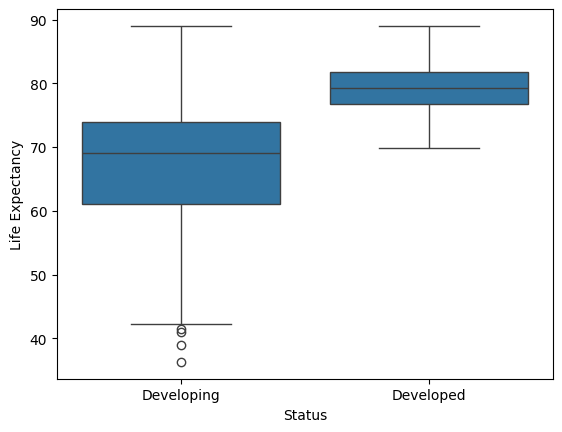

In [14]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["status"], y = df["life-exp"]);
plt.ylabel("Life Expectancy")
plt.xlabel("Status")

#### Scatterplot

<Axes: xlabel='income', ylabel='life-exp'>

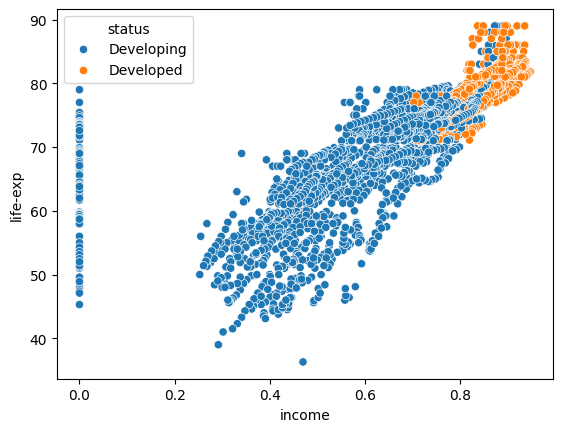

In [15]:
sns.scatterplot(x = df['income'], y = df['life-exp'], hue=df['status'])

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

In [16]:
df = df.drop('country', axis='columns')

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["status"] = le.fit_transform(df["status"])

df["status"].unique()

array([1, 0])

In [18]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Developed', 'Developing'], dtype=object)

In [19]:
# then we can try transform
le.transform(["Developed", "Developing"])

array([0, 1])

<Axes: >

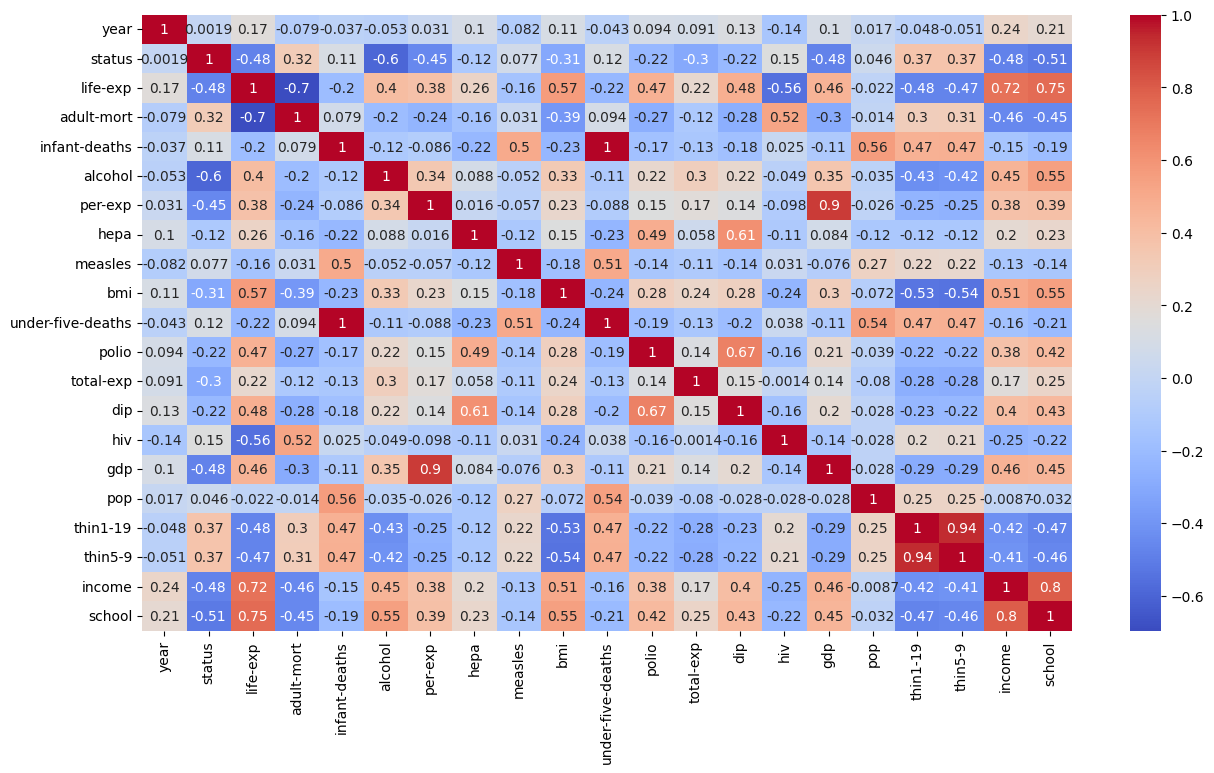

In [20]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

## 3. Feature Engineering

We gonna skip for this tutorial.  But we can certainly try to combine some columsn to create new features.

## 4. Feature selection

In [21]:
#x is our strong features
X = df[        ['income', 'adult-mort']        ]

#y is simply the life expectancy col
y = df["life-exp"]

### Train test split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 5. Preprocessing

### Null values

In [23]:
#check for null values
X_train[['income', 'adult-mort']].isna().sum()

income        110
adult-mort      6
dtype: int64

In [24]:
X_test[['income', 'adult-mort']].isna().sum()

income        57
adult-mort     4
dtype: int64

In [25]:
y_train.isna().sum()

np.int64(6)

In [26]:
y_test.isna().sum()

np.int64(4)

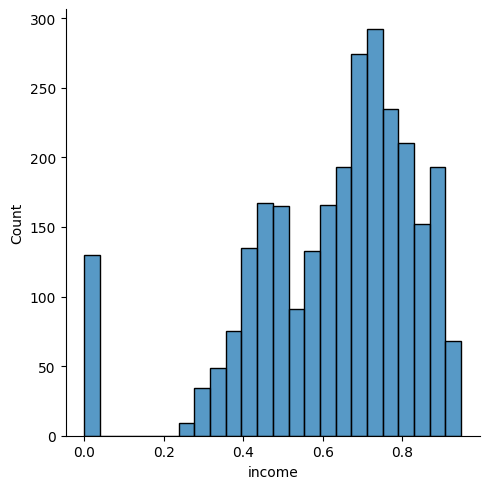

In [27]:
sns.displot(data=df, x='income')

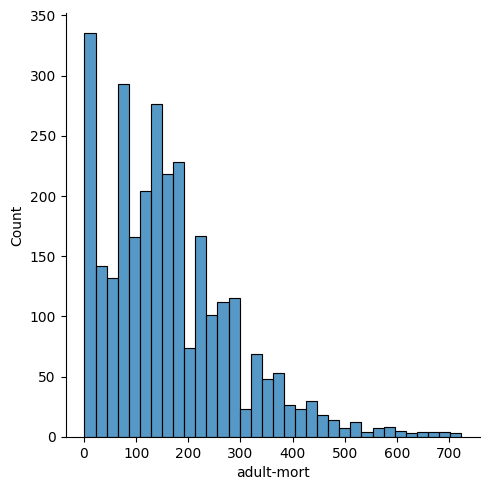

In [28]:
sns.displot(data=df, x='adult-mort')

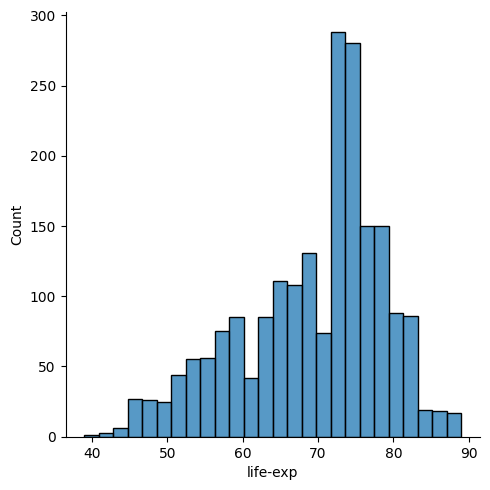

In [29]:
sns.displot(y_train)

In [30]:
#let's fill the training set first!
# X_train['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)

In [31]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['income'].fillna(X_train['income'].median(), inplace=True)
X_test['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)

In [32]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [33]:
#check again
X_train[['income', 'adult-mort']].isna().sum()

income        0
adult-mort    0
dtype: int64

In [34]:
X_test[['income', 'adult-mort']].isna().sum()

income        0
adult-mort    0
dtype: int64

In [35]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

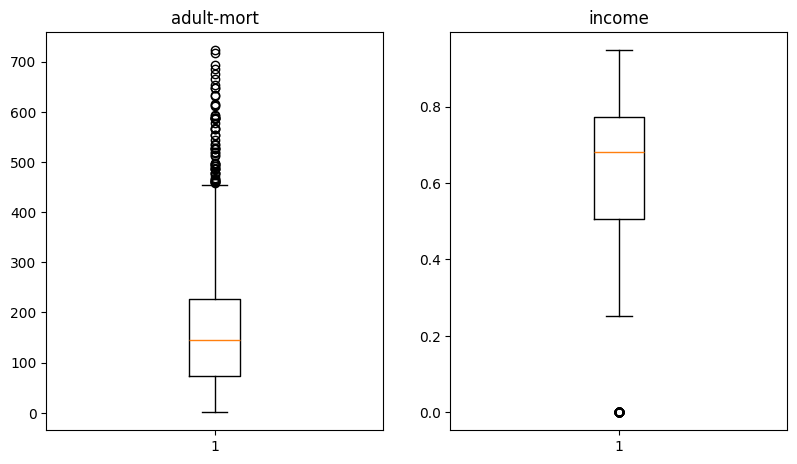

In [36]:
# Create a dictionary of columns.
col_dict = {'adult-mort':1,'income':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [37]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [38]:
for col in X_train.columns:
    outlier_count(col)


---------------income---------------

Number of outliers: 83
Percent of data that is outlier: 4.05%

---------------adult-mort---------------

Number of outliers: 62
Percent of data that is outlier: 3.02%


### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

#x = (x - mean) / std
#why do we want to scale our data before data analysis / machine learning

#allows your machine learning model to catch the pattern/relationship faster
#faster convergence

#how many ways to scale
#standardardization <====current way
# (x - mean) / std
#--> when your data follows normal distribution

#normalization <---another way
# (x - x_min) / (x_max - x_min)
#---> when your data DOES NOT follow normal distribution (e.g., audio, signal, image)

In [40]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (2050, 2)
Shape of X_test:  (878, 2)
Shape of y_train:  (2050,)
Shape of y_test:  (878,)


## 6. Modeling

Let's define some algorithms and compare them using cross-validation.

[Scikit-Learn](http://scikit-learn.org) provides quick access to a huge pool of machine learning algorithms.

Before using sklearn, there is **one thing you need to know**, i.e., the **data shape that sklearn wants**.

To apply majority of the algorithms, sklearn requires two inputs, i.e., $\mathbf{X}$ and $\mathbf{y}$.

-  $\mathbf{X}$, or the **feature matrix** *typically* has the shape of ``[n_samples, n_features]``
-  $\mathbf{y}$, or the **target/label vector** *typically* has the shape of ``[n_samples, ]`` or ``[n_samples, n_targets]`` depending whether that algorithm supports multiple labels

Note 1:  if you $\mathbf{X}$ has only 1 feature, the shape must be ``[n_samples, 1]`` NOT ``[n_samples, ]``

Note 2:  sklearn supports both numpy and pandas, as long as the shape is right.  For example, if you use pandas, $\mathbf{X}$ would be a dataframe, and $\mathbf{y}$ could be a series or dataframe.

Tips:  it's always better to look at sklearn documentation before applying any algorithm.

In [41]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  31.41983373940269
r2:  0.6653055824732301


### Much better: Cross validation + Grid search

In [42]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [43]:
y_train.isna().sum()

np.int64(0)

In [44]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-27.92102315 -29.3627236  -37.08652944 -28.37151312 -25.65233861]; Mean: -29.678825585173563
SVR - Score: [-13.12330333 -14.96609569 -10.81527809 -13.55147058 -12.00073597]; Mean: -12.891376731578159
KNeighbors Regressor - Score: [-6.91855707 -6.78691415 -5.07896488 -6.95968293 -6.40283902]; Mean: -6.429391609756098
Decision-Tree Regressor - Score: [-11.46643767 -11.74194512  -8.80289024  -9.59521951  -8.20768564]; Mean: -9.96283563685637
Random-Forest Regressor - Score: [-6.16800499 -5.36179923 -5.51727849 -6.31205815 -6.10971081]; Mean: -5.893770332586125


Hmm...it seems random forest do very well....how about we grid search further to find the best version of the model.

### Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [46]:
grid.best_params_

{'bootstrap': True, 'max_depth': 10, 'n_estimators': 15}

In [47]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [48]:
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-5.860018891286684)

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [49]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

np.float64(5.669561900675126)

## 8. Analysis:  Feature Importance

Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.  There are several ways: algorithm, permutation, and shap.  Note that these techniques can be mostly applied to most algorithms. 

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [50]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.525947, 0.474053])

<BarContainer object of 2 artists>

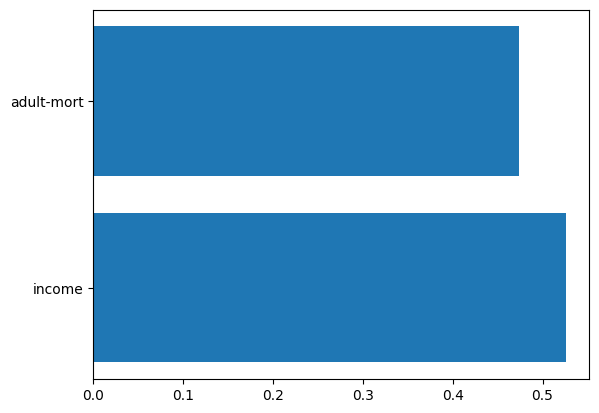

In [51]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

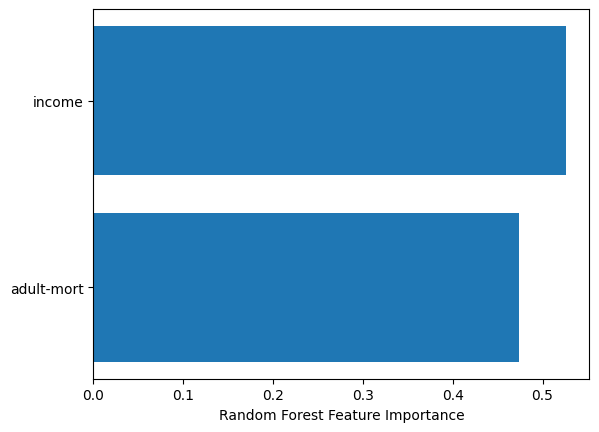

In [52]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

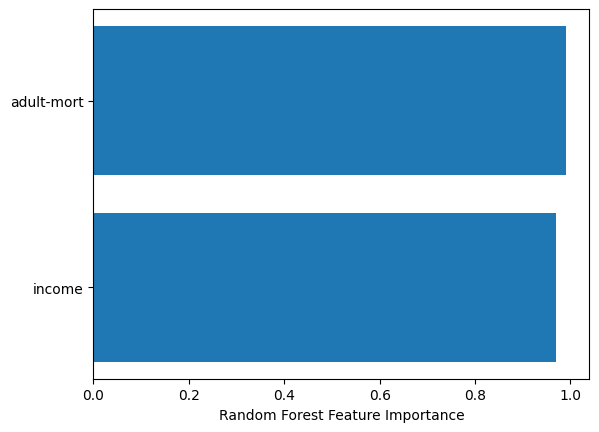

In [53]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [54]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

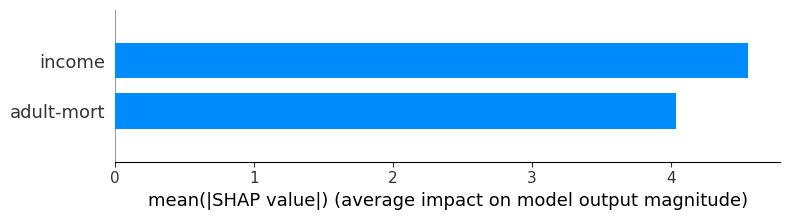

In [55]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [56]:
import pickle

# save the model to disk
filename = 'model/life-expectancy.model'
pickle.dump(grid, open(filename, 'wb'))

In [57]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [58]:
#let's try to create one silly example
df[['income', 'adult-mort', 'life-exp']].loc[1]

income          0.476
adult-mort    271.000
life-exp       59.900
Name: 1, dtype: float64

In [59]:
#['income', 'school', 'adult-mort'] 
sample = np.array([[0.476, 271.000]])

In [60]:
predicted_life_exp = loaded_model.predict(sample)
predicted_life_exp

array([49.78666667])

## Group Workshop - Check your understandings

Answer the following questions:

Instruction:  Gather in your group.  Will randomly pick groups to present.

1.  Why this dataset is a regression problem?
2.  How many samples of data do we have?  How many features do we have?  How many label do we have?
3.  Notice "status" is a object dtype.  What is "object" dtype?
4.  Notice "float64".  What 64 means?

5.  Create another countplot.
6.  Create another displot.
7.  Create another boxplot.
8.  Create another scatterplot.

9.  We have used "label-encoding" which turns category into 0, 1, 2, ...   Another technique is called one-hot encoding.  What's the difference, and what's the pros and cons?
10. What is `random_state` = 42"
11. How do we know whether to replace with mean or median?
12. How many ways to scale data, and when to use them?   Try not to scale, and see whether the mse changes.  Why?
13. Why we should preprocess only AFTER we split the dataset?
14. Try to change to other `X` and try find the best three features which get the best mse.
15. How much mse or $r^2$ is considered good or bad?
16. How do I know which algorithm to use?  There are so many regression algorithms.
17. We use kfold cross-validation.  Try to find other ways of cross-validation.  Hint: search inside sklearn website.
18. In cross-validation and grid search, did we touch the testing set?
19. Why do we need to do grid search after cross validation?
20. What is feature importance?
21. After I got the model, then how can I create a website/mobile application?  Explain in details. 